<a href="https://colab.research.google.com/github/a-chow3/DS-2002/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import folium

In [6]:
df = pd.read_csv("Crime Data.csv")

In [ ]:
df.head()

In [7]:
df = df.drop(columns = ["Cross Street", "Status", "AREA", "Crm Cd", "Part 1-2", "Premis Cd", "Crm Cd 4", "Crm Cd 3", "Weapon Used Cd"])

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,784,VEHICLE - STOLEN,NaN,0,M,O,STREET,NaN,Adult Arrest,510.0,998.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,Central,182,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,330.0,998.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,Southwest,356,BIKE - STOLEN,0344 1251,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,480.0,NaN,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,CLOTHING STORE,NaN,Invest Cont,343.0,NaN,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,666,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,SIDEWALK,NaN,Invest Cont,354.0,NaN,1900 TRANSIENT,34.0944,-118.3277


In [11]:
# Get Rid of NaN Values
df = df.dropna(subset=['LAT', 'LON'])

# Group by LAT and LON to count the number of crimes per location
top_locations = df.groupby(['LAT', 'LON']).size().reset_index(name='crime_count')

# Sort by crime_count in descending order and select the top 25 locations
top_25_locations = top_locations.sort_values(by='crime_count', ascending=False).head(25)

# Create a base map centered around Los Angeles
la_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Function to add markers for each crime incident
def plot_markers(row):
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=3,  # size of the marker
        color='red',  # marker color
        fill=True,
        fill_opacity=0.6
    ).add_to(la_map)

# Apply the function to each row in the dataset
top_25_locations.apply(plot_markers, axis=1)

# Save the map as an HTML file
la_map.save('la_crime_map.html')

# Display the map in a Jupyter notebook (optional)
la_map

In [ ]:
df = df.dropna(subset = ['LAT', 'LON'])

for index, row in df.iterrows():
        folium.Marker(
            location=[row['LAT'], row['LON']],
            popup=row['DR_NO'] # or any other column for popup information
        ).add_to(map_crime)

In [ ]:
display(map_crime)



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


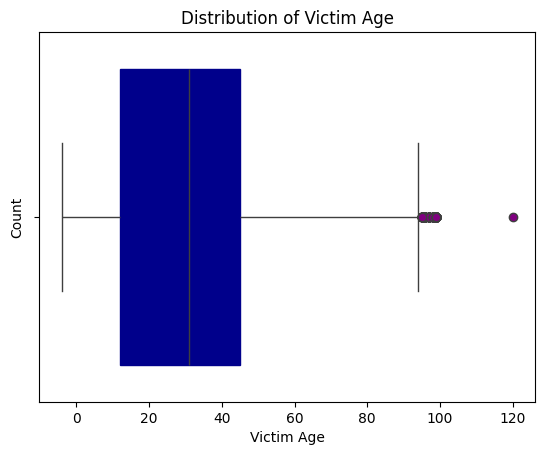

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#plotting victim age

sns.boxplot(x = 'Vict Age', data = df, boxprops=dict(color='darkblue'), flierprops=dict(markerfacecolor='purple', marker='o'))
plt.title('Distribution of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.show()


<ipython-input-35-e0b72997fa03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vict Sex', data=df, palette=palette)
<ipython-input-35-e0b72997fa03>:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(x='Vict Sex', data=df, palette=palette)


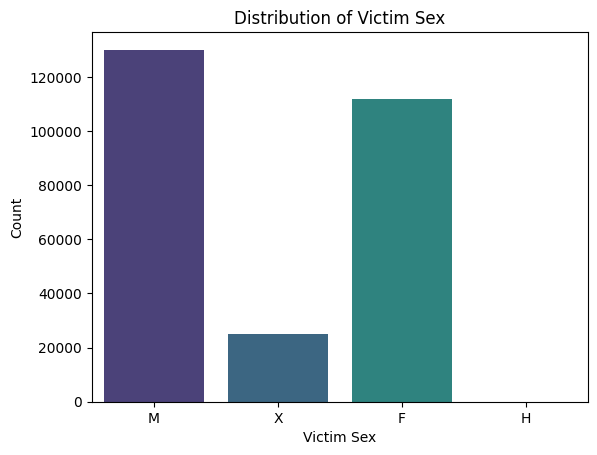

In [ ]:
num_colors = len(df['Vict Sex'].unique())  # Get the number of unique categories
palette = sns.color_palette("viridis", num_colors)  # Generate a color palette with enough colors
sns.countplot(x='Vict Sex', data=df, palette=palette)
plt.title('Distribution of Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.show()

<ipython-input-21-8625bceb9507>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AREA NAME', data=filtered_df, palette=palette)


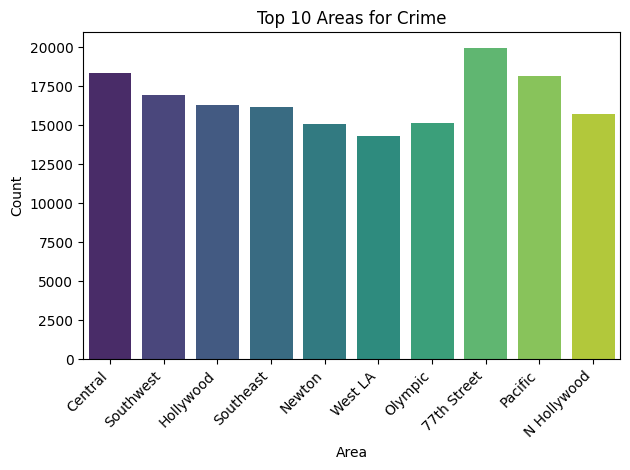

In [ ]:
top_10_areas = df['AREA NAME'].value_counts().nlargest(10).index  # Get the top 10 areas
filtered_df = df[df['AREA NAME'].isin(top_10_areas)]  # Filter the DataFrame


num_colors = len(filtered_df['AREA NAME'].unique())  # Get the number of unique categories
palette = sns.color_palette("viridis", num_colors)  # Generate a color palette with enough colors
sns.countplot(x='AREA NAME', data=filtered_df, palette=palette)
plt.title('Top 10 Areas for Crime')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
df["Date Rptd"] = df["Date Rptd"].str.split().str[0]
df["DATE OCC"] = df["DATE OCC"].str.split().str[0]


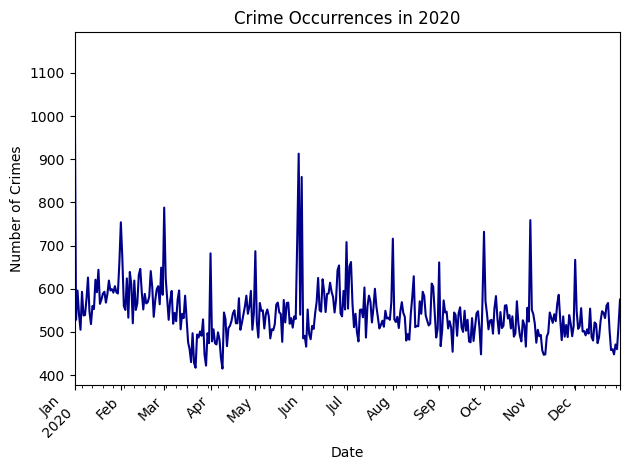

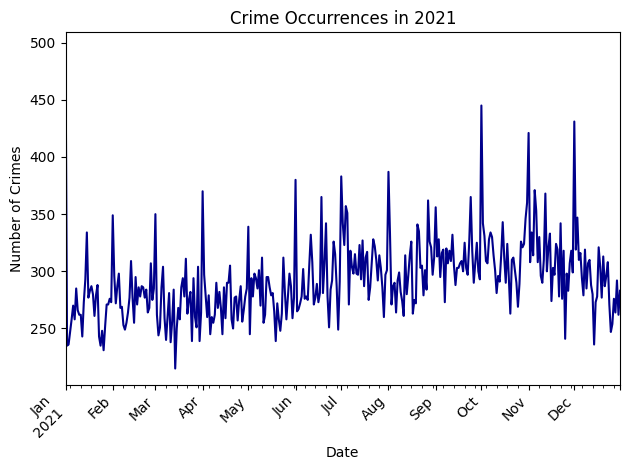

In [ ]:
#making a line plot of date occurred over time

  # Extract the year
if not pd.api.types.is_datetime64_any_dtype(df['DATE OCC']):
    df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y', errors='coerce')

df['Year'] = df['DATE OCC'].dt.year  # Extract the year

for year in df['Year'].unique():
    year_data = df[df['Year'] == year]  # Filter data for the current year
    year_data.groupby('DATE OCC')['DR_NO'].count().plot(kind='line', color ="darkblue")
    plt.title(f'Crime Occurrences in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
df["DATE OCC"].tail()

,DATE OCC
306823,2021-11-04
306824,2021-10-22
306825,2021-06-01
306826,2021-10-17
306827,2021-11-13
